# Data Analytics I

## Consistency of Causal Effect Estimation

We investigate the consistency of the estimator $$\hat \beta = (X'X)^{-1}X'Y.$$ 

To visualize the probability limit of $\hat \beta$ in a Monte Carlo simulation, the following setup is implemented. The control variable $X$ and the error term $U$ are independent and follow a normal distribution. The outcome variable $Y$ is generated by the linear model $$Y=X\beta+U$$ with $\beta=2$. 

For each sample size $N \in \{10,40,160,640,2560,10240\}$, we draw $X$ and $U$. Then, we generate $Y$ according to the linear model. With the sample $\{X_i, Y_i\}_{i=1}^N$, $\hat \beta$ is estimated. This is repeated 2000 times, i.e. for each $N$ we have 2000 estimates $\hat \beta$ and can analyze the distribution of $\hat \beta$ for a given $N$.

### Prepare the Simulation
First, the parameters of the simulation have to be initialized.

In [13]:
### Define Simulation Parameters ###

# Define Sample Sizes
sample_sizes <- c(10, 40, 160, 640, 2560, 10240) # Sample sizes used in the simulation
rep <- 2000 # Number of replications

print('Simulation parameters are defined.')

[1] "Simulation parameters are defined."


### Monte Carlo Simulation
Now, we can draw 2000 different samples of X and U for each $N$, generate Y and estimate $\beta$:

In [14]:
### Monte Carlo Simulation ###

# Set starting value (seed) for random number generators, such that results can be replicated
set.seed(18112020)
     
# Generate matrices to store the results
# Rows correspond to different replications
# Columns correspond to different sample sizes
beta <- matrix(NA, nrow = rep, ncol = length(sample_sizes))
        

# Make a loop
for (n in c(1:length(sample_sizes))) { # For each sample size:
     
    # Data Generating Process
    # Each column represents one of the 2000 replications for a given N
    X <- matrix(rnorm(sample_sizes[n]*rep,mean=0,sd=1), nrow = sample_sizes[n], ncol = rep) 
    U <- matrix(rnorm(sample_sizes[n]*rep,mean=0,sd=1.25), nrow = sample_sizes[n], ncol = rep) # Homoscedastic error term
    Y = 2*X + U
    
    for (i in c(1:rep)) {
              
        # Estimate the OLS coefficient
        beta[i,n] <- solve(t(X[,i])%*%X[,i])%*%t(X[,i])%*%Y[,i] # solve gets us the inverse of X'X.
   
    }
}

print('Simulation executed.')

[1] "Simulation executed."


### Consistency
We plot the distibution of $\hat \beta$.

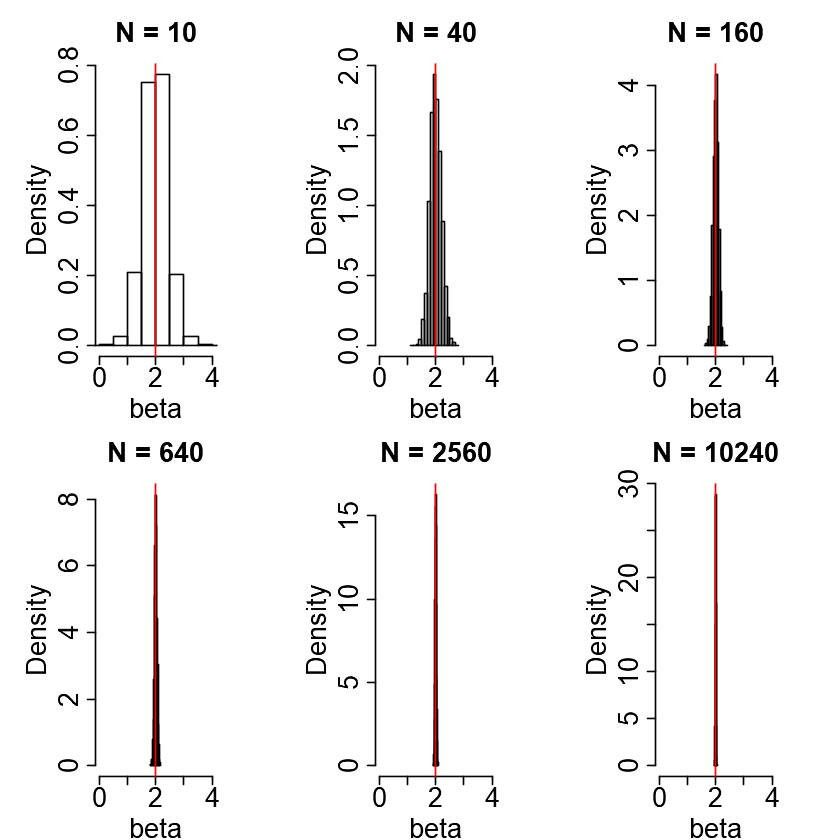

In [15]:
### Consistency ###

# Plot results for 6 different sample sizes separately in 2 rows and 3 columns 
# and change left margins of the plots from 4 (default) to 6 (otherwise the y-axis label is cut off)
par(mfrow = c(2, 3), mar = c(4,6,4,4))

# Histograms of the 2000 estimated betas for each N
for (n in c(1:length(sample_sizes))) {
    hist(beta[,n],xlim = c(0,4), freq = FALSE, main = paste("N =", sample_sizes[n]), xlab = "beta",
        cex.main = 2, cex.lab = 2, cex.axis = 2) # Increase font size of the titles, labels and ticks
    abline(v=2, col="red") # Red vertical line representing the true beta
}